## Financial Modeling (work in progress)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
years = ['2018A', '2019B', '2020P', '2021P', '2022P', '2023P']
growth_rate = 0.1
sales = pd.Series(index=years)
sales['2018A'] = 31.0  
for year in range(1, 6):
    sales[year] = sales[year-1]*(1+growth_rate)

sales

<ipython-input-2-6916403e7e29>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sales = pd.Series(index=years)


2018A    31.00000
2019B    34.10000
2020P    37.51000
2021P    41.26100
2022P    45.38710
2023P    49.92581
dtype: float64

In [3]:
ebitda_margin = 0.14
depr_percent = 0.032
ebitda = sales * ebitda_margin
depreciation = sales * depr_percent
ebit = ebitda - depreciation
nwc_percent = 0.24
nwc = sales * nwc_percent
change_in_nwc = nwc.shift(1) - nwc 
capex_percent = depr_percent
capex = -(sales * capex_percent)
tax_rate = 0.25
tax_payment = -ebit * tax_rate
tax_payment = tax_payment.apply(lambda x: min(x, 0))
free_cash_flow = ebit + depreciation + tax_payment + capex + change_in_nwc
free_cash_flow

2018A         NaN
2019B    2.018100
2020P    2.219910
2021P    2.441901
2022P    2.686091
2023P    2.954700
dtype: float64

In [4]:
cost_of_capital = 0.12
terminal_growth = 0.02
terminal_value = ((free_cash_flow[-1] * (1 + terminal_growth)) / 
                 (cost_of_capital - terminal_growth))
discount_factors = [(1 / (1 + cost_of_capital)) ** i for i in range (1,6)]
dcf_value = (sum(free_cash_flow[1:] * discount_factors) +
            terminal_value * discount_factors[-1])
dcf_value

25.79438401113792

In [5]:
output = pd.DataFrame([sales, ebit, free_cash_flow],
                     index=['Sales', 'EBIT', 'Free Cash Flow']).round(1)
output

,2018A,2019B,2020P,2021P,2022P,2023P
Sales,31.0,34.1,37.5,41.3,45.4,49.9
EBIT,3.3,3.7,4.1,4.5,4.9,5.4
Free Cash Flow,NaN,2.0,2.2,2.4,2.7,3.0


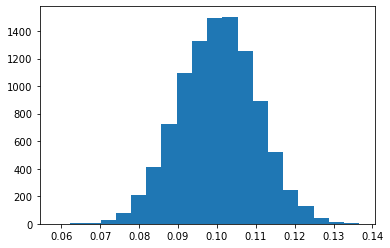

In [6]:
iterations = 10000
sales_growth_dist = np.random.normal(loc=0.1, scale=0.01, size=iterations)
ebitda_margin_dist = np.random.normal(loc=0.14, scale=0.02, size=iterations)
nwc_percent_dist = np.random.normal(loc=0.24, scale=0.01, size=iterations)
plt.hist(sales_growth_dist, bins=20)
plt.show()

In [7]:
def mcs():
    
    # Create probability distributions
    sales_growth_dist = np.random.normal(loc=0.1, scale=0.01, size=iterations)
    ebitda_margin_dist = np.random.normal(loc=0.14, scale=0.02, size=iterations)
    nwc_percent_dist = np.random.normal(loc=0.24, scale=0.01, size=iterations)
    
    # Calculate DCF value for each set of random inputs
    output_distribution = []
    for i in range(iterations):
        for year in range(1, 6):
            sales[year] = sales[year - 1] * (1 + sales_growth_dist[0])
        ebitda = sales * ebitda_margin_dist[i]
        depreciation = (sales * depr_percent)
        ebit = ebitda - depreciation
        nwc = sales * nwc_percent_dist[i]
        change_in_nwc = nwc.shift(1) - nwc 
        capex = -(sales * capex_percent)
        tax_payment = -ebit * tax_rate
        tax_payment = tax_payment.apply(lambda x: min(x, 0))
        free_cash_flow = ebit + depreciation + tax_payment + capex + change_in_nwc
        
        # DCF valuation
        terminal_value = (free_cash_flow[-1] * 1.02) / (cost_of_capital - 0.02)
        free_cash_flow[-1] += terminal_value
        discount_factors = [(1 / (1 + cost_of_capital)) ** i for i in range (1,6)]
        dcf_value = sum(free_cash_flow[1:] * discount_factors )
        output_distribution.append(dcf_value)
    
    return output_distribution

CPU times: user 13.4 s, sys: 56.5 ms, total: 13.4 s
Wall time: 13.4 s


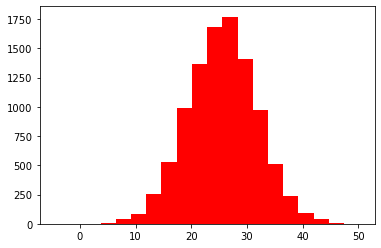

In [8]:
%time plt.hist(mcs(), bins=20, color='r')
plt.show()